<a href="https://colab.research.google.com/github/noushin94/myExercising/blob/main/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models , layers
from keras.datasets import mnist

In [20]:
def preprocessing_data():
   (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
   X_train , X_test = X_train/255.0 , X_test/255.0
   return X_train, X_test , Y_train, Y_test


In [15]:
def CNN_model():

  net = models.Sequential([

                           layers.Conv2D(32, (3,3), activation= "relu", input_shape = (28,28,1)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(4, (3,3), activation= "relu"),
                           layers.Flatten(),
                           layers.Dense(10, activation= "softmax")




  ])


  net.compile( optimizer= "SGD",
               metrics= ["accuracy"],
               loss= "sparse_categorical_crossentropy"
              )

  return net

In [29]:
def showing_result():

  plt.plot(H.history["accuracy"] , label= "train accuracy")
  plt.plot(H.history["val_accuracy"] , label= "test accuracy")
  plt.plot(H.history["loss"] , label= "train loss")
  plt.plot(H.history["val_loss"] , label= "test loss")
  plt.xlabel("epochs")
  plt.ylabel("accuracy/loss")
  plt.title("CNN model for mnist")
  plt.legend()
  plt.show()
  pass

In [22]:
X_train, X_test , Y_train, Y_test= preprocessing_data()

In [16]:
net = CNN_model()

In [17]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 4)         1156      
                                                                 
 flatten_1 (Flatten)         (None, 484)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4850      
                                                                 
Total params: 6326 (24.71 KB)
Trainable params: 6326 (24.71 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
H = net.fit(X_train, Y_train, batch_size= 32, validation_data= (X_test, Y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.6099 - accuracy: 0.8143 - val_loss: 0.2637 - val_accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2329 - accuracy: 0.9318 - val_loss: 0.1816 - val_accuracy: 0.9480
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1750 - accuracy: 0.9488 - val_loss: 0.1424 - val_accuracy: 0.9575
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1462 - accuracy: 0.9574 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1286 - accuracy: 0.9621 - val_loss: 0.1112 - val_accuracy: 0.9664
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1155 - accuracy: 0.9658 - val_loss: 0.1004 - val_accuracy: 0.9686
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1051 - accuracy: 0.9691 - val_loss: 0.0873 -

In [24]:
loss , accuracy = net.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0852 - accuracy: 0.9734


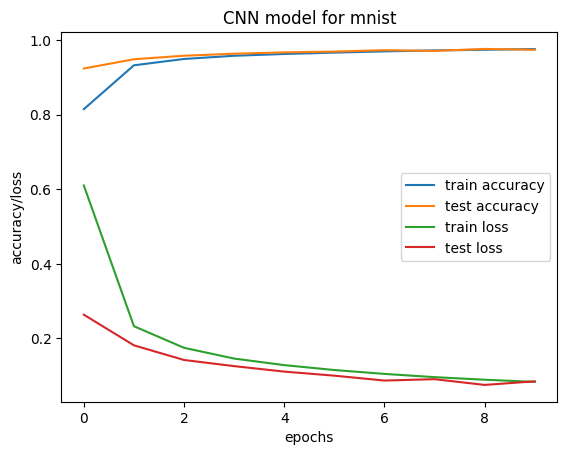

In [30]:
showing_result()